/opt/anaconda3/envs/pyprobml-env/lib/python3.10/site-packages/probml_utils/plotting.py:70: UserWarning: renaming ./figures/bayesChangeOfVar.pdf to ./figures/bayesChangeOfVar_latexified.pdf because LATEXIFY is True
  warnings.warn(


saving image to ./figures/bayesChangeOfVar_latexified.pdf
Figure size: [6.4 4.8]


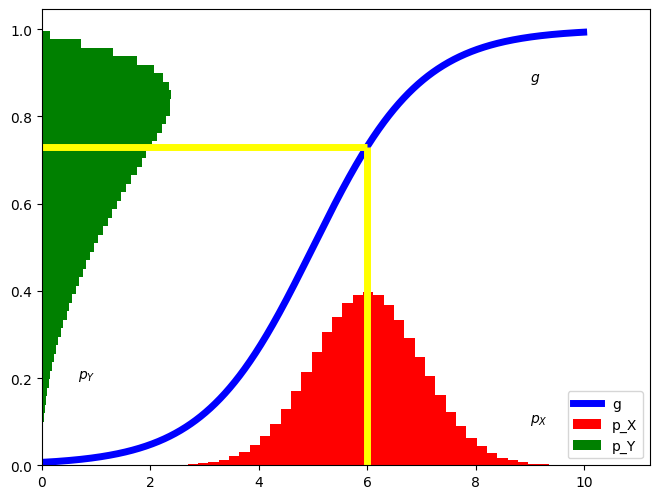

In [3]:
# 基于 https://github.com/probml/pmtk3/blob/master/demos/bayesChangeOfVar.m
# 演示变量变换和经验分布的蒙特卡洛方法,强调模式通常不会被保留

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os
try:
    from probml_utils import savefig
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig
# 设置保存图形的目录配置
# os.environ['FIG_DIR'] = './figures'

# 确保随机结果可重现
np.random.seed(42)
    
# 定义从x空间到y空间的映射函数
def ginv(x):
    """变换函数"""
    return 1 / (1 + np.exp(5 - x))

# 在x空间定义概率密度并从中采样
# 设置正态分布的参数
mu = 6  # 均值
sigma = 1  # 标准差
# 设置样本数量，生成100万个样本
n = 10 ** 6
# 从正态分布中生成随机样本
x_samples = norm.rvs(size=n, loc=mu, scale=sigma)

# 计算x空间样本的直方图和它们变换到y空间后的直方图
hist_x, bin_edges_x = np.histogram(x_samples, bins=50, density=True)
hist_y, bin_edges_y = np.histogram(ginv(x_samples), bins=50, density=True)

# 绘制直方图、映射函数,以及x分布的均值如何映射到y空间
linewidth = 5
# 绘制 X 空间的直方图
plt.bar(bin_edges_x[:-1], hist_x, 
        color='red', align='edge', 
        width=bin_edges_x[1] - bin_edges_x[0],
        label='p_X')

# 绘制 Y 空间的直方图
plt.barh(bin_edges_y[:-1], hist_y, 
         color='green', align='edge', 
         height=bin_edges_y[1] - bin_edges_y[0],
         label='p_Y')

# 绘制映射函数 g
x_range = np.arange(0, 10, 0.01)
plt.plot(x_range, ginv(x_range), 'blue', 
         linewidth=linewidth, label='g')

# 绘制均值的映射
plt.vlines(mu, ymin=0, ymax=ginv(mu), 
           color='yellow', linewidth=linewidth)
plt.hlines(ginv(mu), xmin=0, xmax=mu, 
           color='yellow', linewidth=linewidth)

# 添加标签
plt.text(9, 1/10, r'$p_X$')
plt.text(2/3, 2/10, r'$p_Y$')
plt.text(9, ginv(9) - 1/10, r'$g$')

# 添加图例
plt.legend()

# 保存图形
savefig('bayesChangeOfVar.pdf')
plt.show()
